In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.DataFrame(columns=["dataset", "type", "epoch", "accuracy"])
ll = [10, 30, 50, 100, 200, 1000, 2000]
for dataset in [f"creak_n{l}" for l in ll]: #, "creak_n2000"
    for typ in ["original", "contradiction_sampler", "implication_unfiltered_sampler", "implication_filtered_sampler", "contradiction_implication_filtered_sampler", "contradiction_implication_unfiltered_sampler"]:
        log_file = "logs_with_rel_dev/log_"+dataset+"_type_"+typ+".txt"
        try:
            with open(log_file, "r") as f:
                lines = f.readlines()
            # Read all lines that start with "accuracy=" and extract the accuracy
            dev_accuracies = [float(line.split("dev_accuracy=")[1].strip()) for line in lines if line.startswith("dev_accuracy=")]
            test_accuracies = [float(line.split("test_accuracy=")[1].strip()) for line in lines if line.startswith("test_accuracy=")]

            for i, acc in enumerate(dev_accuracies):
                df = df.append({"dataset": dataset, "type": typ, "epoch": i+1, "accuracy": acc, "rel_acc":test_accuracies[i]}, ignore_index=True)
        except:
            print(f"Could not read {log_file}.")
            continue
        

df

Could not read logs_with_rel_dev/log_creak_n200_type_implication_unfiltered_sampler.txt.
Could not read logs_with_rel_dev/log_creak_n1000_type_original.txt.
Could not read logs_with_rel_dev/log_creak_n1000_type_contradiction_sampler.txt.
Could not read logs_with_rel_dev/log_creak_n1000_type_implication_unfiltered_sampler.txt.
Could not read logs_with_rel_dev/log_creak_n1000_type_implication_filtered_sampler.txt.
Could not read logs_with_rel_dev/log_creak_n1000_type_contradiction_implication_filtered_sampler.txt.
Could not read logs_with_rel_dev/log_creak_n1000_type_contradiction_implication_unfiltered_sampler.txt.
Could not read logs_with_rel_dev/log_creak_n2000_type_original.txt.
Could not read logs_with_rel_dev/log_creak_n2000_type_contradiction_sampler.txt.
Could not read logs_with_rel_dev/log_creak_n2000_type_implication_unfiltered_sampler.txt.
Could not read logs_with_rel_dev/log_creak_n2000_type_implication_filtered_sampler.txt.
Could not read logs_with_rel_dev/log_creak_n2000_ty

,dataset,type,epoch,accuracy,rel_acc
0,creak_n10,original,1,13.202042,27.777778
1,creak_n10,original,2,13.347921,19.444444
2,creak_n10,original,3,15.171408,22.222222
3,creak_n10,original,4,15.754923,22.222222
4,creak_n10,original,5,17.432531,19.444444
...,...,...,...,...,...
435,creak_n200,contradiction_implication_unfiltered_sampler,9,88.402626,93.923611
436,creak_n200,contradiction_implication_unfiltered_sampler,10,88.402626,93.923611
437,creak_n200,contradiction_implication_unfiltered_sampler,11,87.673231,93.576389
438,creak_n200,contradiction_implication_unfiltered_sampler,12,87.892050,93.402778


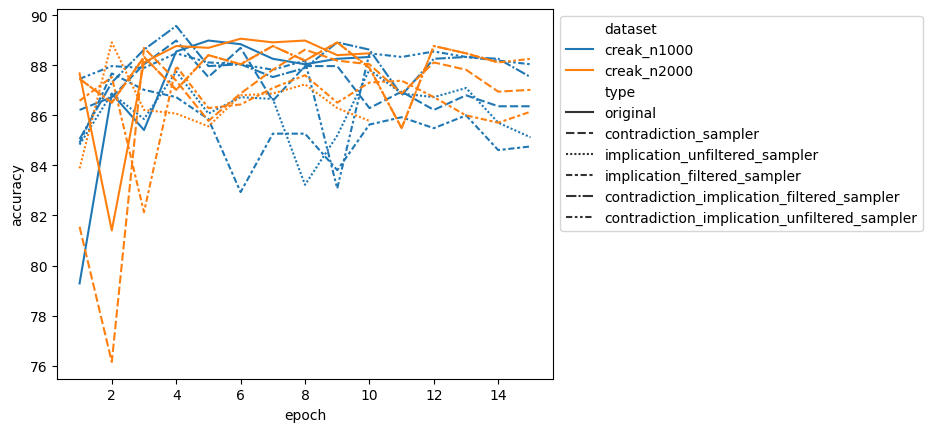

In [3]:
# Scatter plot x axis is epoch, y axis is accuracy, style is type, hue is dataset
ax = sns.lineplot(data=df.loc[df['dataset'].isin(["creak_n1000", "creak_n2000"])], x="epoch", y="accuracy", style="type", hue="dataset")
# Place legend to out of plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

# plt.ylim(75, 90)
# 

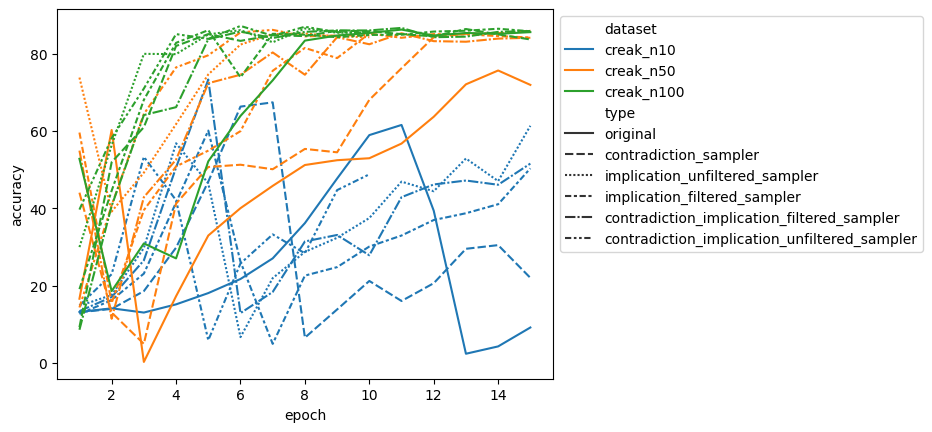

In [4]:
# Scatter plot x axis is epoch, y axis is accuracy, style is type, hue is dataset
ax = sns.lineplot(data=df.loc[df['dataset'].isin(["creak_n10", "creak_n50", "creak_n100"])], x="epoch", y="accuracy", style="type", hue="dataset")
# Place legend to out of plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [5]:
# Group by dataset and type, get max accuracy over all epochs.
summ = df.groupby(["dataset", "type"]).agg({"accuracy": ["max"]})
# Reset type index
summ = summ.reset_index()
# Simplify column names and remove multiindex
summ.columns = summ.columns.droplevel(1)
summ = summ.pivot(index="type", columns="dataset", values="accuracy")

summ = summ.loc[:,["creak_n10", "creak_n30", "creak_n50", "creak_n100", "creak_n200", "creak_n1000", "creak_n2000"]]
summ = summ.loc[["original", "contradiction_sampler", "implication_unfiltered_sampler", "implication_filtered_sampler", "contradiction_implication_filtered_sampler", "contradiction_implication_unfiltered_sampler"],:]

# Rename rows
summ = summ.rename(index={"original": "Original", "contradiction_sampler": "Contradiction", "implication_unfiltered_sampler": "Implication (no double-check)", "implication_filtered_sampler": "Implication", "contradiction_implication_filtered_sampler": "Contradiction + Implication", "contradiction_implication_unfiltered_sampler": "Contradiction + Implication (no double-check)"})

# Set index to be left aligned
summ.index = pd.Index(summ.index, dtype=object)


summ.round(1)

dataset,creak_n10,creak_n30,creak_n50,creak_n100,creak_n200,creak_n1000,creak_n2000
type,,,,,,,
Original,61.6,65.8,75.6,86.2,88.0,89.0,89.1
Contradiction,67.4,66.3,85.9,86.4,86.9,89.0,88.7
Implication (no double-check),61.3,85.0,85.2,86.5,87.4,87.8,88.9
Implication,60.1,71.1,85.2,86.4,85.9,87.7,88.0
Contradiction + Implication,73.3,65.9,85.3,86.7,86.5,89.6,88.9
Contradiction + Implication (no double-check),53.3,65.7,86.1,87.2,87.8,88.5,88.9


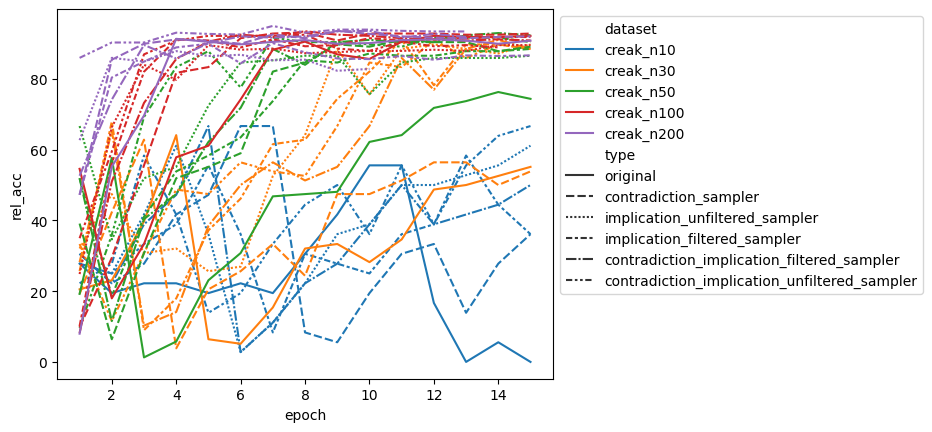

In [7]:
# Scatter plot x axis is epoch, y axis is accuracy, style is type, hue is dataset
ax = sns.lineplot(data=df, x="epoch", y="rel_acc", style="type", hue="dataset")
# Place legend to out of plot
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [9]:
# Group by dataset and type, get max accuracy over all epochs.
summ = df.groupby(["dataset", "type"]).agg({"rel_acc": ["max"]})
# Reset type index
summ = summ.reset_index()
# Simplify column names and remove multiindex
summ.columns = summ.columns.droplevel(1)
summ = summ.pivot(index="type", columns="dataset", values="rel_acc")

summ = summ.loc[:,["creak_n10", "creak_n30", "creak_n50", "creak_n100", "creak_n200"]]
summ = summ.loc[["original", "contradiction_sampler", "implication_unfiltered_sampler", "implication_filtered_sampler", "contradiction_implication_filtered_sampler", "contradiction_implication_unfiltered_sampler"],:]

# Rename rows
summ = summ.rename(index={"original": "Original", "contradiction_sampler": "Contradiction", "implication_unfiltered_sampler": "Implication (no double-check)", "implication_filtered_sampler": "Implication", "contradiction_implication_filtered_sampler": "Contradiction + Implication", "contradiction_implication_unfiltered_sampler": "Contradiction + Implication (no double-check)"})

# Set index to be left aligned
summ.index = pd.Index(summ.index, dtype=object)


summ.round(1)

dataset,creak_n10,creak_n30,creak_n50,creak_n100,creak_n200
type,,,,,
Original,55.6,64.1,76.3,92.2,91.3
Contradiction,66.7,62.8,91.0,93.1,93.6
Implication (no double-check),61.1,89.7,86.5,89.5,87.8
Implication,58.3,91.0,88.5,91.8,90.1
Contradiction + Implication,66.7,91.0,92.9,93.5,93.6
Contradiction + Implication (no double-check),66.7,91.0,91.7,92.5,95.0


In [ ]:
sns.scatterplot(data=df, x="epoch", y="accuracy", style="type", hue="dataset")

(70.0, 90.0)

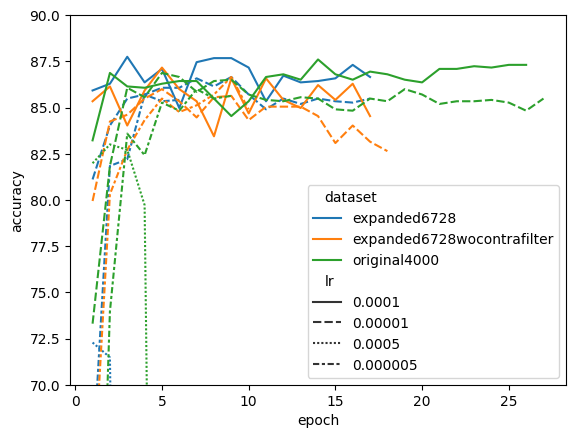

In [45]:
# Line plot x axis is epoch, y axis is accuracy, color is dataset, line style is lr
sns.lineplot(data=df, x="epoch", y="accuracy", hue="dataset", style="lr")
# Set y axis to between 70 and 100
plt.ylim(70, 90)

In [5]:
creak_train="/projectnb/llamagrp/feyzanb/dune/source/fine-tuning-pool/all_shuffled_edits.txt"

import pandas as pd

with open(creak_train, "r") as f:
    lines = [l.strip() for l in f.readlines()]


In [4]:
pd.DataFrame({"label": lines, "input_prompt":""})[:20].to_csv("/projectnb/llamagrp/feyzanb/dune/source/fine-tuning-pool/all_shuffled_edits_short.csv", index=False)

In [7]:
# Get the first word of each line
first_words = [l.split(" ")[0] for l in lines]
remainder = [" ".join(l.split(" ")[1:]) for l in lines]

In [9]:
df = pd.DataFrame({"label": remainder, "input_prompt": first_words})
df[:20].to_csv("/projectnb/llamagrp/feyzanb/dune/source/fine-tuning-pool/all_shuffled_edits_first_word_remainder.csv", index=False)